In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [ ]:
nba_reg = pd.read_csv('2021-2022 NBA Player Stats - Regular.csv',delimiter=",", encoding="latin-1")
nba_plf = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv', delimiter=",", encoding='latin-1')
nba_reg.drop(columns=['Rk'],inplace=True)
nba_plf.drop(columns=['Rk'],inplace=True)

nba_reg.head(), nba_plf.head()

(              Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
 0   Precious Achiuwa   C   22  TOR  73  28  23.6  3.6   8.3  0.439  ...   
 1       Steven Adams   C   28  MEM  76  75  26.3  2.8   5.1  0.547  ...   
 2        Bam Adebayo   C   24  MIA  56  56  32.6  7.3  13.0  0.557  ...   
 3       Santi Aldama  PF   21  MEM  32   0  11.3  1.7   4.1  0.402  ...   
 4  LaMarcus Aldridge   C   36  BRK  47  12  22.3  5.4   9.7  0.550  ...   
 
      FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
 0  0.595  2.0  4.5   6.5  1.1  0.5  0.6  1.2  2.1   9.1  
 1  0.543  4.6  5.4  10.0  3.4  0.9  0.8  1.5  2.0   6.9  
 2  0.753  2.4  7.6  10.1  3.4  1.4  0.8  2.6  3.1  19.1  
 3  0.625  1.0  1.7   2.7  0.7  0.2  0.3  0.5  1.1   4.1  
 4  0.873  1.6  3.9   5.5  0.9  0.3  1.0  0.9  1.7  12.9  
 
 [5 rows x 29 columns],
                      Player Pos  Age   Tm   G  GS    MP   FG  FGA    FG%  ...  \
 0          Precious Achiuwa   C   22  TOR   6   1  27.8  4.2  8.7  0.481  ...  

In [ ]:
nba_reg.columns, nba_plf.columns

(Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
        '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
        'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
       dtype='object'),
 Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
        '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
        'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
       dtype='object'))

In [ ]:
nba_reg.isnull().sum(), nba_plf.isnull().sum()

(Player    0
 Pos       0
 Age       0
 Tm        0
 G         0
 GS        0
 MP        0
 FG        0
 FGA       0
 FG%       0
 3P        0
 3PA       0
 3P%       0
 2P        0
 2PA       0
 2P%       0
 eFG%      0
 FT        0
 FTA       0
 FT%       0
 ORB       0
 DRB       0
 TRB       0
 AST       0
 STL       0
 BLK       0
 TOV       0
 PF        0
 PTS       0
 dtype: int64,
 Player    0
 Pos       0
 Age       0
 Tm        0
 G         0
 GS        0
 MP        0
 FG        0
 FGA       0
 FG%       0
 3P        0
 3PA       0
 3P%       0
 2P        0
 2PA       0
 2P%       0
 eFG%      0
 FT        0
 FTA       0
 FT%       0
 ORB       0
 DRB       0
 TRB       0
 AST       0
 STL       0
 BLK       0
 TOV       0
 PF        0
 PTS       0
 dtype: int64)

In [ ]:
nba_reg.Player.nunique(), nba_plf.Player.nunique()

(605, 217)

Creating the Efficiency metric by taking offensive metrics as positive and defensive metrics as negative, which gives us a net value based on which we can judge the overall performance of a player


In [ ]:
nba_reg['EFF'] = nba_reg.PTS + nba_reg.TRB + nba_reg.AST + nba_reg.STL + nba_reg.BLK - (nba_reg.FGA - nba_reg.FG) - (nba_reg.FTA - nba_reg.FT) - nba_reg.TOV
nba_plf['EFF'] = nba_plf.PTS + nba_plf.TRB + nba_plf.AST + nba_plf.STL + nba_plf.BLK - (nba_plf.FGA - nba_plf.FG) - (nba_plf.FTA - nba_plf.FT) - nba_plf.TOV


In [ ]:
nba_reg['Reg/Plf'] = 'Reg'
nba_plf['Reg/Plf'] = 'Plf'

nba_final = pd.concat([nba_reg,nba_plf])
nba_final.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,11.2,Reg
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17.0,Reg
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,25.0,Reg
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,4.7,Reg
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,15.1,Reg


In [ ]:
nba_final.Age.describe()

count    1029.000000
mean       26.165209
std         4.101807
min        19.000000
25%        23.000000
50%        25.000000
75%        29.000000
max        41.000000
Name: Age, dtype: float64

In [ ]:
nba_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 216
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   1029 non-null   object 
 1   Pos      1029 non-null   object 
 2   Age      1029 non-null   int64  
 3   Tm       1029 non-null   object 
 4   G        1029 non-null   int64  
 5   GS       1029 non-null   int64  
 6   MP       1029 non-null   float64
 7   FG       1029 non-null   float64
 8   FGA      1029 non-null   float64
 9   FG%      1029 non-null   float64
 10  3P       1029 non-null   float64
 11  3PA      1029 non-null   float64
 12  3P%      1029 non-null   float64
 13  2P       1029 non-null   float64
 14  2PA      1029 non-null   float64
 15  2P%      1029 non-null   float64
 16  eFG%     1029 non-null   float64
 17  FT       1029 non-null   float64
 18  FTA      1029 non-null   float64
 19  FT%      1029 non-null   float64
 20  ORB      1029 non-null   float64
 21  DRB      1029 n

In [ ]:
nba_final['Age_bracket'] = np.where(nba_final['Age']<=23, 'Rookie', np.where((nba_final['Age']>23)&(nba_final['Age']<=30), 'Prime', np.where((nba_final['Age']>30)&(nba_final['Age']<=35),"Senior","Experienced")))
nba_final.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,11.2,Reg,Rookie
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17.0,Reg,Prime
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,10.1,3.4,1.4,0.8,2.6,3.1,19.1,25.0,Reg,Prime
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,2.7,0.7,0.2,0.3,0.5,1.1,4.1,4.7,Reg,Rookie
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,5.5,0.9,0.3,1.0,0.9,1.7,12.9,15.1,Reg,Experienced


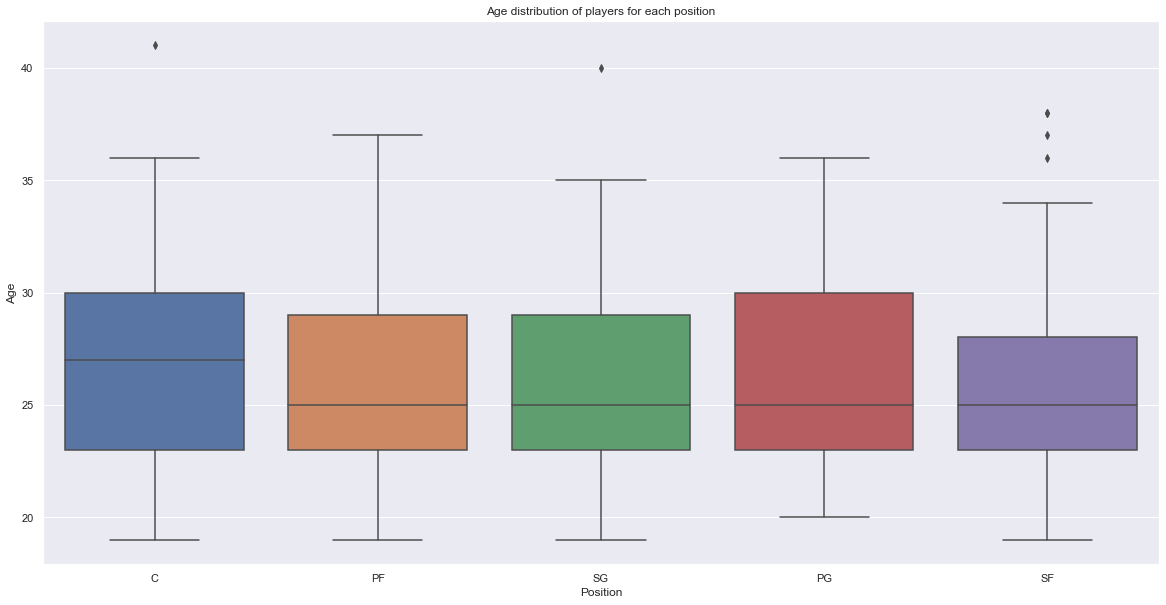

In [ ]:
main_pos = ['C','PF','SG','PG','SF']
temp=nba_final[nba_final['Pos'].isin(main_pos)]

ax = sns.boxplot(data=temp, x='Pos',y='Age')
ax.set(xlabel='Position', ylabel='Age', title='Age distribution of players for each position')
plt.show()

Here we can see that for most positions very few players are actually coming under the 'Experienced' age bracket, and only a few players here are the outliers who are above 35

[Text(0.5, 1.0, 'Points per game across different positions in the League'),
 Text(0.5, 0, 'Position'),
 Text(0, 0.5, 'Points Per Game')]

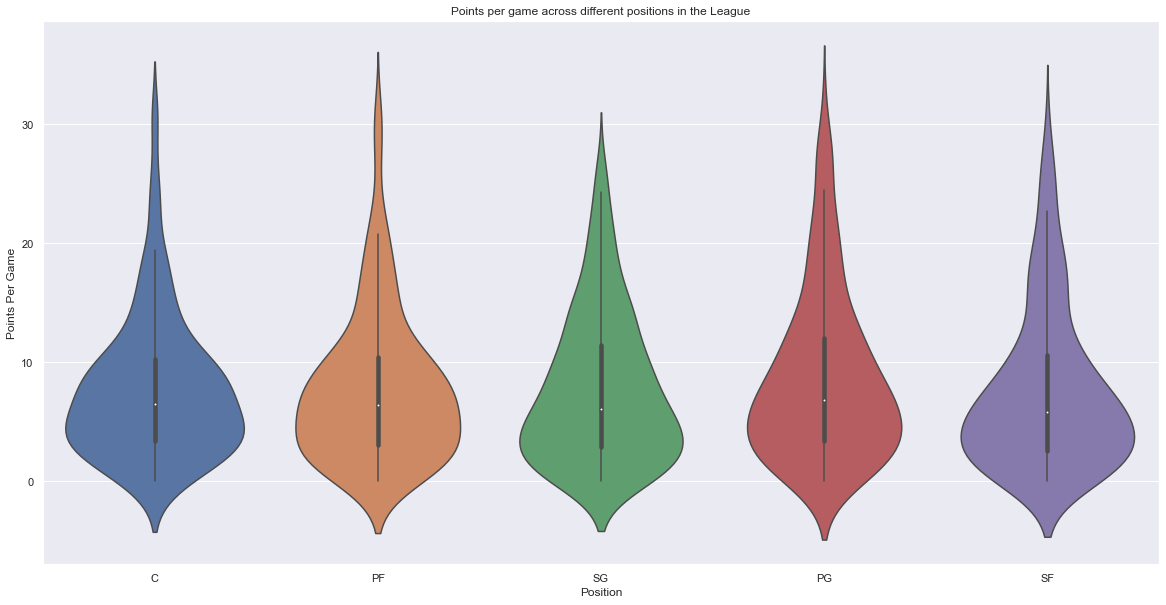

In [ ]:

ax = sns.violinplot(data=temp, x='Pos',y='PTS')
ax.set(title='Points per game across different positions in the League',xlabel='Position', ylabel='Points Per Game')
# plt.show()

This graph further reinforces how the position of a player is not relevant to their scoring ability in the modern era. Earlier a player playing at Center would be great at defense and not venture too much into offense but today all positions have a fairly similar Points per Game distribution

Text(0.5, 0.98, 'Points Per Game for different age categories and different positions\n\n')

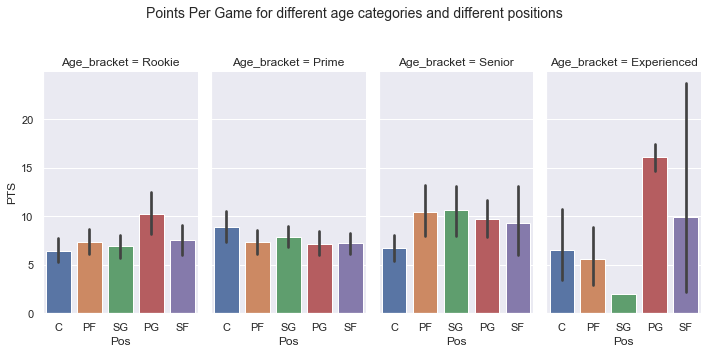

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

sns.catplot(
    data=temp, kind="bar",
    x="Pos", y="PTS", col="Age_bracket", col_order=['Rookie','Prime','Senior','Experienced'],
    aspect=.5
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Points Per Game for different age categories and different positions\n\n", fontsize=14)


Here, we can see that Lebron James is the outlier for the SF position and Chris Paul is the outlier for the PG position. Both are very senior players who have been playing at the highest level and they are still maintaining those standards at their age, which showcases their longevity in the game.

Text(0.5, 1.0, 'Correlation heatmap for all the features')

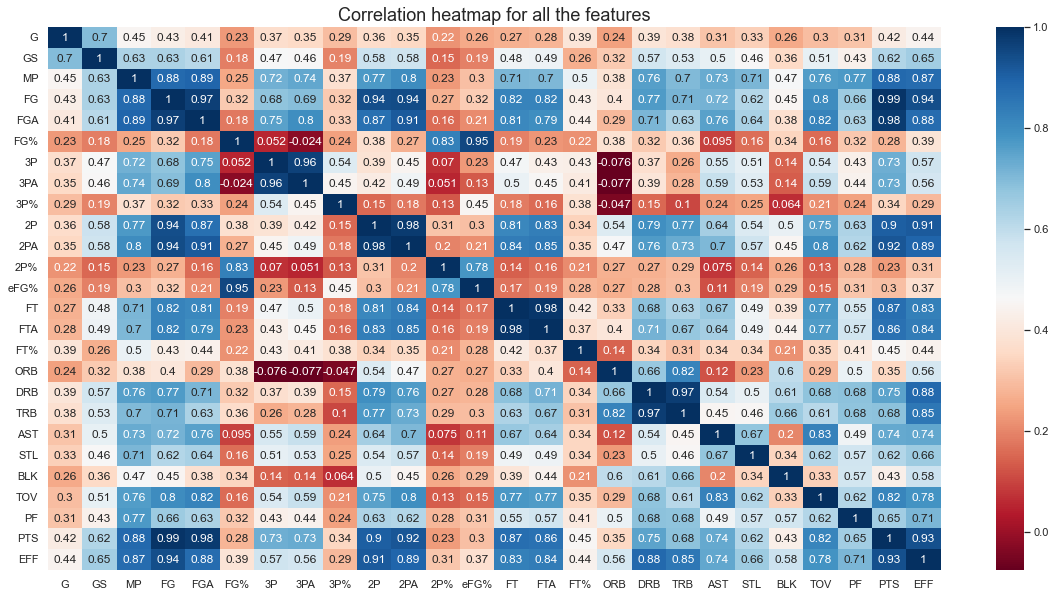

In [ ]:
corr = nba_final.drop(columns='Age').corr()
sns.set(rc={'figure.figsize':((20,10))})
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.title('Correlation heatmap for all the features', fontsize=18)


[Text(0.5, 0, 'Pos'),
 Text(0, 0.5, 'Field Goal %'),
 Text(0.5, 1.0, 'Field Goal Percentage Comparison across the positions')]

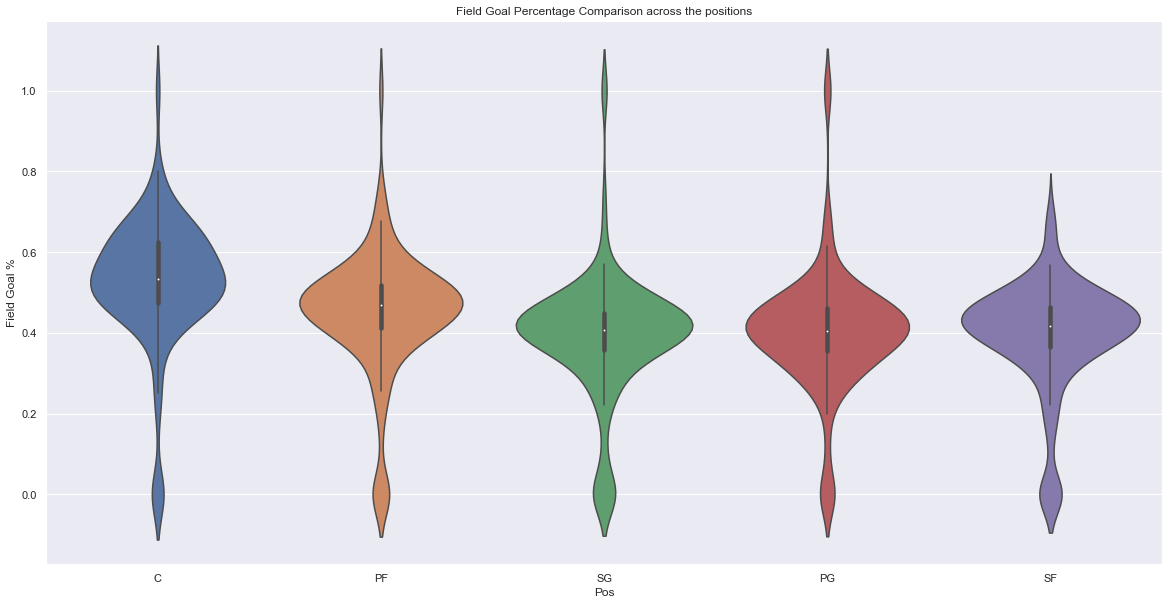

In [ ]:

ax = sns.violinplot(data=temp, x='Pos',y='FG%')
ax.set(xlabel='Pos', ylabel='Field Goal %', title="Field Goal Percentage Comparison across the positions")
# plt.show()

This graph suggest that the Centers are the most accurate shooters while Point Guards and Shooting Guards are comparatively not as accurate. But this can be attributed to Shooting Guards and Point Guards are the playmakers of the game and they are generally taking shots in more crowded areas and taking tougher shots, while Centers are generally taking their shots when they are wide open at the end of the play. Hence, centers tend to have a slightly better Field Goal % compared to other positions

In [ ]:
nba_final[nba_final['Reg/Plf']=='Reg'].sort_values('EFF', ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
391,Nikola Jokic,C,26,DEN,74,74,33.5,10.3,17.7,0.583,...,13.8,7.9,1.5,0.9,3.8,2.6,27.1,38.8,Reg,Prime
15,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,18.6,0.553,...,11.6,5.8,1.1,1.4,3.3,3.2,29.9,35.1,Reg,Prime
206,Joel Embiid,C,27,PHI,68,68,33.8,9.8,19.6,0.499,...,11.7,4.2,1.1,1.5,3.1,2.7,30.6,34.0,Reg,Prime
368,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,...,8.2,6.2,1.3,1.1,3.5,2.2,30.3,31.7,Reg,Experienced
198,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,...,7.4,6.4,0.9,0.9,3.5,2.1,29.9,31.6,Reg,Senior
178,Luka Doncic,PG,22,DAL,65,65,35.4,9.9,21.6,0.457,...,9.1,8.7,1.2,0.6,4.5,2.2,28.4,29.9,Reg,Rookie
736,Karl-Anthony Towns,C,26,MIN,74,74,33.5,8.7,16.4,0.529,...,9.8,3.6,1.0,1.1,3.1,3.6,24.6,28.2,Reg,Prime
257,Rudy Gobert,C,29,UTA,66,66,32.1,5.5,7.7,0.713,...,14.7,1.1,0.7,2.1,1.8,2.7,15.6,28.1,Reg,Prime
648,Domantas Sabonis,C,25,IND,47,46,34.7,7.0,12.1,0.580,...,12.1,5.0,1.0,0.5,3.0,3.1,18.9,28.0,Reg,Prime
160,Anthony Davis,C,28,LAL,40,40,35.1,9.3,17.4,0.532,...,9.9,3.1,1.2,2.3,2.1,2.4,23.2,27.8,Reg,Prime


In [ ]:
nba_final[nba_final['Reg/Plf']=='Plf'].sort_values('EFF', ascending=False).head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
109,Nikola Jokic,C,26,DEN,5,5,34.2,12.2,21.2,0.575,...,13.2,5.8,1.6,1.0,4.8,4.0,31.0,37.8,Plf,Prime
7,Giannis Antetokounmpo,PF,27,MIL,12,12,37.3,11.7,23.8,0.491,...,14.2,6.8,0.7,1.3,4.5,3.6,31.7,34.5,Plf,Prime
62,Luka Doncic,PG,22,DAL,15,15,36.8,10.7,23.5,0.455,...,9.8,6.4,1.8,0.6,3.9,2.9,31.7,31.5,Plf,Rookie
144,Ja Morant,PG,22,MEM,9,9,37.6,9.0,20.4,0.440,...,8.0,9.8,2.0,0.4,3.6,2.4,27.1,29.8,Plf,Rookie
39,Jimmy Butler,SF,32,MIA,17,17,37.0,9.8,19.3,0.506,...,7.4,4.6,2.1,0.6,1.5,1.5,27.4,29.8,Plf,Senior
57,Stephen Curry,PG,33,GSW,22,18,34.7,9.2,20.0,0.459,...,5.2,5.9,1.3,0.4,2.6,2.7,27.4,25.8,Plf,Senior
179,Pascal Siakam,PF,27,TOR,6,6,43.3,8.5,17.8,0.477,...,7.2,5.8,1.2,1.0,2.2,4.0,22.8,25.7,Plf,Prime
193,Karl-Anthony Towns,C,26,MIN,6,6,37.0,6.5,13.3,0.488,...,10.8,2.2,0.7,2.0,4.5,4.2,21.8,25.1,Plf,Prime
103,Brandon Ingram,SF,24,NOP,6,6,39.3,9.3,19.7,0.475,...,6.2,6.2,0.7,0.3,3.8,1.8,27.0,24.9,Plf,Prime
202,Nikola Vucevic,C,31,CHI,5,5,36.2,8.0,18.2,0.440,...,12.4,3.2,0.4,1.2,1.6,2.8,19.4,24.6,Plf,Senior


In [ ]:
df = nba_final[nba_final['Age_bracket']=='Rookie']
df.PTS.describe(), df.EFF.describe()

(count    305.000000
 mean       7.656393
 std        6.223304
 min        0.000000
 25%        3.100000
 50%        6.200000
 75%       10.400000
 max       31.700000
 Name: PTS, dtype: float64,
 count    305.000000
 mean       8.355738
 std        6.512723
 min       -2.000000
 25%        3.100000
 50%        7.400000
 75%       12.000000
 max       31.500000
 Name: EFF, dtype: float64)

Here, now that we have the efficiency metric, we filter out the Rookies from the league and further filter the group of players based on the 75th percentile of the current group

In [ ]:
df1 = df[(df['PTS']>=10) & (df['EFF']>=12)]

C = df1[df1['Pos']=='C']
PG = df1[df1['Pos']=='PG']
PF = df1[df1['Pos']=='PF']
SG = df1[df1['Pos']=='SG']
SF = df1[df1['Pos']=='SF']



The tables below give us the best performing youngsters currently in the league based on their positions. It is worth noting that quite a few of these players are already leaders of their teams, ex: Ja Morant for the Memphis Grizzlies and Luka Doncic for the Dallas Mavericks. Hence, based on this metric alone, we can say that these players have the potential to be the stars of the league!

In [ ]:
#Center
C

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
9,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,0.677,...,10.8,1.6,0.8,1.3,1.7,1.7,16.1,24.5,Reg,Rookie
27,Deandre Ayton,C,23,PHO,58,58,29.5,7.6,12.0,0.634,...,10.2,1.4,0.7,0.7,1.6,2.4,17.2,23.6,Reg,Rookie
34,Mo Bamba,C,23,ORL,71,69,25.7,4.2,8.7,0.480,...,8.1,1.2,0.5,1.7,1.1,2.6,10.6,16.3,Reg,Rookie
119,Wendell Carter Jr.,C,22,ORL,62,61,29.9,5.8,11.0,0.525,...,10.5,2.8,0.6,0.7,1.9,2.7,15.0,21.5,Reg,Rookie
10,Deandre Ayton,C,23,PHO,13,13,30.5,8.1,12.6,0.640,...,8.9,1.7,0.4,0.8,1.5,2.6,17.9,22.8,Plf,Rookie
48,Nic Claxton,C,22,BRK,4,0,24.5,4.8,6.0,0.792,...,6.3,1.5,1.3,2.3,0.5,1.5,10.5,15.7,Plf,Rookie


In [ ]:
#Point Guards
PG

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
18,Cole Anthony,PG,21,ORL,65,65,31.7,5.5,14.0,0.391,...,5.4,5.7,0.7,0.3,2.6,2.6,16.3,16.7,Reg,Rookie
32,LaMelo Ball,PG,20,CHO,75,75,32.3,7.2,16.7,0.429,...,6.7,7.6,1.6,0.4,3.3,3.2,20.1,23.2,Reg,Rookie
155,Cade Cunningham,PG,20,DET,64,64,32.6,6.7,16.1,0.416,...,5.5,5.6,1.2,0.7,3.7,3.1,17.4,16.9,Reg,Rookie
178,Luka Doncic,PG,22,DAL,65,65,35.4,9.9,21.6,0.457,...,9.1,8.7,1.2,0.6,4.5,2.2,28.4,29.9,Reg,Rookie
236,Markelle Fultz,PG,23,ORL,18,3,20.0,4.6,9.7,0.474,...,2.7,5.5,1.1,0.3,2.2,1.2,10.8,12.8,Reg,Rookie
246,Darius Garland,PG,22,CLE,68,68,35.7,8.0,17.3,0.462,...,3.3,8.6,1.3,0.1,3.6,1.7,21.7,21.8,Reg,Rookie
254,Shai Gilgeous-Alexander,PG,23,OKC,56,56,34.7,8.5,18.8,0.453,...,5.0,5.9,1.3,0.8,2.8,2.5,24.5,23.1,Reg,Rookie
278,Tyrese Haliburton,PG,21,IND,26,26,36.1,6.2,12.4,0.502,...,4.3,9.6,1.8,0.6,3.2,1.9,17.5,23.9,Reg,Rookie
484,Tyrese Maxey,PG,21,PHI,75,74,35.3,6.4,13.3,0.485,...,3.2,4.3,0.7,0.4,1.2,2.1,17.5,17.5,Reg,Rookie
526,Ja Morant,PG,22,MEM,57,57,33.1,10.2,20.6,0.493,...,5.7,6.7,1.2,0.4,3.4,1.5,27.4,25.8,Reg,Rookie


In [ ]:
#Power Forwards
PF

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
29,Marvin Bagley III,PF,22,TOT,48,25,23.9,4.7,9.3,0.504,...,7.0,0.8,0.5,0.4,0.8,1.9,11.3,13.9,Reg,Rookie
31,Marvin Bagley III,PF,22,DET,18,8,27.2,6.2,11.1,0.555,...,6.8,1.1,0.7,0.4,1.0,2.4,14.6,16.5,Reg,Rookie
39,Scottie Barnes,PF,20,TOR,74,74,35.4,6.2,12.6,0.492,...,7.5,3.5,1.1,0.7,1.8,2.6,15.3,19.1,Reg,Rookie
47,Darius Bazley,PF,21,OKC,69,53,27.9,4.0,9.4,0.422,...,6.3,1.4,0.8,1.0,1.3,1.0,10.8,12.8,Reg,Rookie
78,Miles Bridges,PF,23,CHO,80,80,35.5,7.5,15.2,0.491,...,7.0,3.8,0.9,0.8,1.9,2.4,20.2,22.2,Reg,Rookie
360,Jaren Jackson Jr.,PF,22,MEM,78,78,27.3,5.5,13.3,0.415,...,5.8,1.1,0.9,2.3,1.7,3.5,16.3,16.1,Reg,Rookie
516,Evan Mobley,PF,20,CLE,69,69,33.8,6.1,12.0,0.508,...,8.3,2.5,0.8,1.7,1.9,2.1,15.0,19.2,Reg,Rookie
637,Isaiah Roby,PF,23,OKC,45,28,21.1,3.7,7.2,0.514,...,4.8,1.6,0.8,0.8,1.0,2.4,10.1,12.7,Reg,Rookie
686,Jalen Smith,PF,21,IND,22,4,24.7,5.1,9.7,0.531,...,7.6,0.8,0.4,1.0,0.9,2.0,13.4,17.1,Reg,Rookie
765,P.J. Washington,PF,23,CHO,65,28,27.2,3.8,8.2,0.470,...,5.2,2.3,0.9,0.9,1.3,2.3,10.3,13.6,Reg,Rookie


In [ ]:
#Shooting Guards
SG

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
170,Hamidou Diallo,SG,23,DET,58,29,21.9,4.5,9.1,0.496,...,4.8,1.3,1.2,0.3,1.0,2.5,11.0,12.2,Reg,Rookie
200,Anthony Edwards,SG,20,MIN,72,72,34.3,7.6,17.3,0.441,...,4.8,3.8,1.5,0.6,2.6,2.3,21.3,18.9,Reg,Rookie
253,Josh Giddey,SG,19,OKC,54,54,31.5,5.2,12.4,0.419,...,7.8,6.4,0.9,0.4,3.2,1.6,12.5,17.1,Reg,Rookie
267,Jalen Green,SG,19,HOU,67,67,31.9,6.1,14.2,0.426,...,3.4,2.6,0.7,0.3,2.0,1.5,17.3,13.5,Reg,Rookie
277,Tyrese Haliburton,SG,21,SAC,51,51,34.5,5.3,11.5,0.457,...,3.9,7.4,1.7,0.7,2.3,1.4,14.3,19.2,Reg,Rookie
309,Tyler Herro,SG,22,MIA,66,10,32.6,7.6,17.0,0.447,...,5.0,4.0,0.7,0.1,2.6,1.4,20.7,18.1,Reg,Rookie
341,Kevin Huerter,SG,23,ATL,74,60,29.6,4.7,10.3,0.454,...,3.4,2.7,0.7,0.4,1.2,2.5,12.1,12.4,Reg,Rookie
504,De'Anthony Melton,SG,23,MEM,73,15,22.7,3.8,9.5,0.404,...,4.5,2.7,1.4,0.5,1.5,1.8,10.8,12.3,Reg,Rookie
517,Malik Monk,SG,23,LAL,76,37,28.1,5.1,10.9,0.473,...,3.4,2.9,0.8,0.4,1.6,1.8,13.8,13.6,Reg,Rookie
596,Jordan Poole,SG,22,GSW,76,51,30.0,6.2,13.9,0.448,...,3.4,4.0,0.8,0.3,2.5,2.7,18.5,16.5,Reg,Rookie


In [ ]:
#Small Forwards
SF

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Reg/Plf,Age_bracket
35,Desmond Bane,SF,23,MEM,76,76,29.8,6.7,14.5,0.461,...,4.4,2.7,1.2,0.4,1.5,2.6,18.2,17.4,Reg,Rookie
40,RJ Barrett,SF,21,NYK,70,70,34.5,7.0,17.1,0.408,...,5.8,3.0,0.6,0.2,2.2,2.0,20.0,15.6,Reg,Rookie
58,Saddiq Bey,SF,22,DET,82,82,33.0,5.5,13.9,0.396,...,5.4,2.8,0.9,0.2,1.2,1.6,16.1,15.3,Reg,Rookie
179,Luguentz Dort,SF,22,OKC,51,51,32.6,5.7,14.2,0.404,...,4.2,1.7,0.9,0.4,1.7,2.9,17.2,13.7,Reg,Rookie
320,Jaylen Hoard,SF,22,OKC,7,5,34.3,6.3,12.9,0.489,...,12.0,2.4,0.9,0.7,1.1,2.0,14.7,21.9,Reg,Rookie
383,Keldon Johnson,SF,22,SAS,75,74,31.9,6.3,13.5,0.466,...,6.1,2.1,0.8,0.2,1.2,2.0,17.0,17.1,Reg,Rookie
409,Georgios Kalaitzakis,SF,23,OKC,4,4,41.5,6.5,14.0,0.464,...,3.3,3.0,2.5,0.3,4.0,2.8,17.5,12.3,Reg,Rookie
708,Jayson Tatum,SF,23,BOS,76,76,35.9,9.3,20.6,0.453,...,8.0,4.4,1.0,0.6,2.9,2.3,26.9,25.8,Reg,Rookie
749,Devin Vassell,SF,21,SAS,71,32,27.3,4.6,10.8,0.427,...,4.3,1.9,1.1,0.6,0.8,2.0,12.3,13.0,Reg,Rookie
753,Franz Wagner,SF,20,ORL,79,79,30.7,5.8,12.3,0.468,...,4.5,2.9,0.9,0.4,1.5,2.1,15.2,15.5,Reg,Rookie


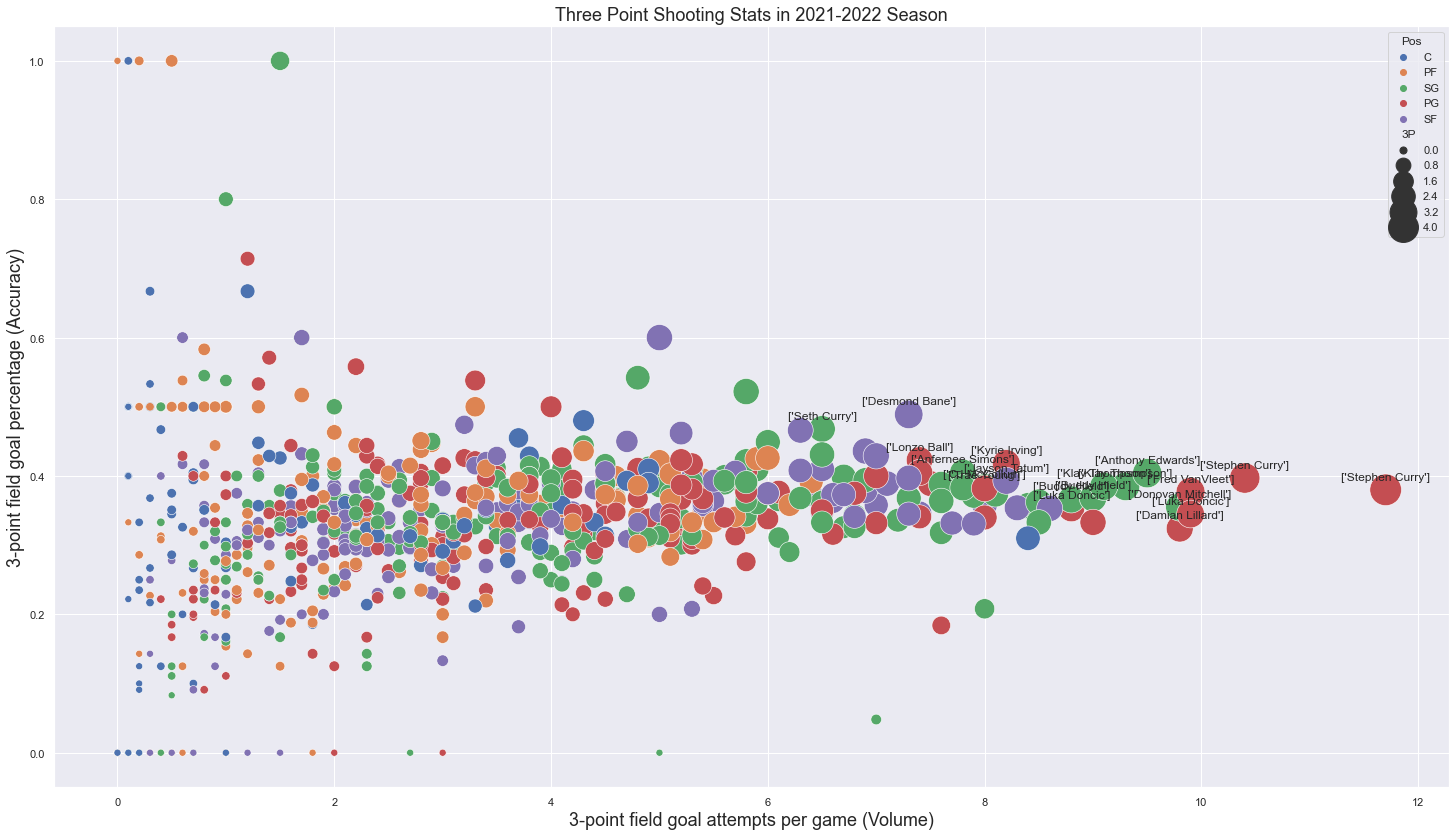

In [ ]:
sns.set(rc={'figure.figsize':(25,14)})
x = temp.sort_values('3P', ascending=False).head(20)

ax = sns.scatterplot(data=temp, x='3PA', y='3P%', hue='Pos', size='3P', sizes=(50,1000))
plt.title('Three Point Shooting Stats in 2021-2022 Season', fontsize=18)
plt.xlabel('3-point field goal attempts per game (Volume)', fontsize=18)
plt.ylabel('3-point field goal percentage (Accuracy)', fontsize=18)

for x,y in zip(x['3PA'],x['3P%']):

    label = temp[(temp['3PA']==x) & (temp['3P%']==y)]['Player'].unique()

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

Here, we can see that Stephen Curry is well clear of the rest of the league in three point shots, as Stephen Curry and the Golden State Warriors have built their team around Curry, allowing him to have a high volume of shots, which combined with his accuracy gives him a lot more points than other players in the league! (as suggested by the size of the bubbles here)

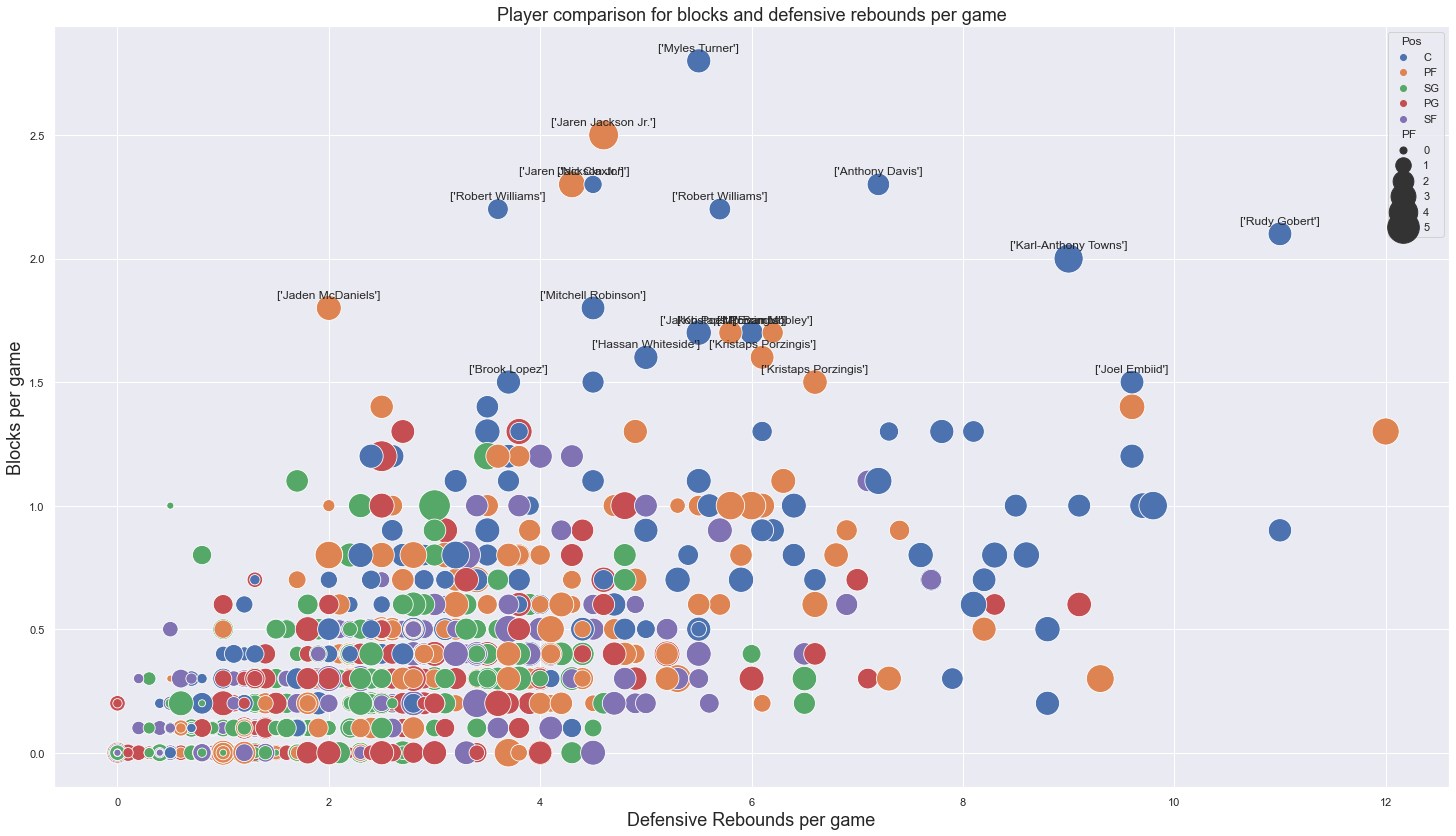

In [ ]:
sns.set(rc={'figure.figsize':(25,14)})
sns.scatterplot(x='DRB', y='BLK', data=temp, hue='Pos', size='PF', sizes=(50,1000))
plt.title('Player comparison for blocks and defensive rebounds per game', fontsize=18)
plt.xlabel('Defensive Rebounds per game', fontsize=18)
plt.ylabel('Blocks per game', fontsize=18)


t = temp.sort_values('BLK', ascending=False).head(20)
for x,y in zip(t['DRB'],t['BLK']):

    label = temp[(temp['DRB']==x) & (temp['BLK']==y)]['Player'].unique()

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')


Defensively, Anthony Davis, Karl-Anthony Towns, Rudy Gobert are some of the best defensive players in the league thanks to their excellent rebounding in defence and comparatively less number of fouls given away by them based on the size of the bubbles